# Determine Food Item's Food Category
# using TRA categorization System
# with XGBoost ML algotithm (classification task)

<img src="./t.png" alt="alt text" style="height: 400px">

https://www.canada.ca/en/health-canada/services/technical-documents-labelling-requirements/nutrition-labelling-table-reference-amounts-food.html




# import package

In [1]:
# package for fine tune
import numpy as np
import pandas as pd

In [2]:
# conda activate dl-env (Anaconda Powershell Prompt, enter)
# pip install sentence-transformers
from sentence_transformers import SentenceTransformer
import pandas as pd
import numpy as np

model = SentenceTransformer('multi-qa-MiniLM-L6-cos-v1')

c:\Users\huguanla\.conda\envs\dl-env\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
### Load default packages
import numpy as np
import pandas as pd
import os
import re
import random
import seaborn as sns
import matplotlib.pyplot as plt
# import lightgbm as lgb
import statistics 

# set random
seed = 1234
random.seed = 1234
np.random.seed(seed)

# no warning
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline 

# 64 bit
import sys
def is_64bit() -> bool:
    return sys.maxsize > 2**32
is_64bit()

True

In [4]:
### Load embedding-SBERT packages
#from sentence_transformers import SentenceTransformer
#model = SentenceTransformer('all-mpnet-base-v2')

### Load t-SNE packages
from sklearn.manifold import TSNE

### Load xgboost packages
# !pip install xgboost
import xgboost

from sklearn.multiclass import OneVsRestClassifier ##### !!!! MultiClass Classifier

### Load prediction packages
from sklearn import metrics, preprocessing, linear_model, svm, gaussian_process, neighbors
from sklearn.metrics import roc_auc_score,mean_squared_error,r2_score,accuracy_score,balanced_accuracy_score,roc_curve,auc,f1_score
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
# classification
from xgboost.sklearn import XGBClassifier #XGBoost Classifier
# regression
from xgboost.sklearn import XGBRegressor #XGBoost

# import OFF data

In [20]:
dfOFF_FN = pd.read_csv("C:/Users/huguanla/Dropbox/545_Group_Project/545_Group_project_shared/data/food_fact_withUnhealthScore_withNOVA.csv",header=0)
dfOFF_FN

,Unnamed: 0,code,product_name,brands,country,ingredients_text,additives,nutrition_grade_fr,energy,fat,...,proteins,salt,sodium,nutrition-score-fr,serving_size_numeric,serving_size_units,KCAL,NAsodium,FSANZ-hgl,NOVA-hgl
0,67,32117,Tricolor Tortellini,Napoleon,United States,"Egg pasta (refined durum semolina wheat flour,...",0.0,c,1611.0,9.23,...,13.85,1.13284,0.446000,7.0,65.0,g,385.406699,446.000000,-4.089640,3
1,72,33060,10-Grain Pancake Mix,Bob's Red Mill,United States,"Wheat, rye, triticale, oat, corn, barley, soy ...",2.0,c,1297.0,1.72,...,13.79,2.75844,1.086000,9.0,58.0,g,310.287081,1086.000000,-8.053166,4
2,175,69601,Fresh Organic Carrots,Bunny-Luv,United States,Fresh organic carrots,0.0,a,159.0,0.00,...,1.28,0.19558,0.077000,-2.0,78.0,g,38.038278,77.000000,-9.774875,1
3,176,290616,Salade Cesar,Kirkland Signature,Canada,INGREDIENTS : LAITUE. VINAIGRETTE (HUILE DE CA...,0.0,c,1210.0,12.00,...,22.00,2.16000,0.850000,6.0,100.0,g,289.473684,850.000000,1.966481,4
4,182,1938067,Chaussons tressés aux pommes,Kirkland Signature,Canada,"Ingrédients : Pâte (farine, margarines d'huile...",5.0,c,1090.0,10.70,...,3.33,0.64700,0.255000,9.0,150.0,g,260.765550,255.000000,4.214868,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105180,355883,95656335,Chipotle Peppers In Adobo Sauce,La Costena,United States,"Chipotle peppers, water, vinegar, tomatoes, on...",0.0,c,280.0,0.00,...,0.00,3.21818,1.267000,6.0,30.0,g,66.985646,1267.000000,-13.900986,3
105181,355884,95659305,Dal Makhani,Truly Indian,United States,"Tomato, black gram, water, milk cream, cottons...",0.0,b,502.0,5.33,...,4.67,1.37160,0.540000,2.0,150.0,g,120.095694,540.000000,-6.750500,3
105182,355888,9577283844672,100% Pur Jus 4 agrumes,Cora,France,"Jus d'orange (dont pulpe 1,6%), jus de clément...",0.0,c,192.0,0.50,...,0.60,0.03000,0.011811,4.0,200.0,ml,45.933014,11.811024,-3.312844,1
105183,355985,9787461062105,Natural Cassava,Industria De Casabe Paul,United States,Cassava.,0.0,a,1477.0,0.00,...,1.18,0.03048,0.012000,-1.0,85.0,g,353.349282,12.000000,-3.944408,1


In [13]:
### Import Emdedding raw data
embOFFi = np.load('C:/Users/huguanla/Dropbox/545_Group_Project/545_Group_project_shared/data/food_fact_BERT_embedding/emb_ingred_OpenFoodFact545_20241105.npz')['emb']


In [ ]:
import pandas as pd
data = pd.read_csv('C:/Users/huguanla/Dropbox/545_Group_Project/545_Group_project_shared/data/en.openfoodfacts.org.products.tsv', sep='\t')
data


/var/folders/6l/n964dwrj0ys303n336mlx0k40000gn/T/ipykernel_72841/3935618398.py:2: DtypeWarning: Columns (0,3,5,19,20,24,25,26,27,28,36,37,38,39,48) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('/Users/hgl/Dropbox/545_Group_Project/545_Group_project_shared/data/en.openfoodfacts.org.products.tsv', sep='\t')


,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,...,fruits-vegetables-nuts_100g,fruits-vegetables-nuts-estimate_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
0,3087,http://world-en.openfoodfacts.org/product/0000...,openfoodfacts-contributors,1474103866,2016-09-17T09:17:46Z,1474103893,2016-09-17T09:18:13Z,Farine de blé noir,NaN,1kg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4530,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,14.0,14.0,NaN,NaN
2,4559,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Peanuts,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN
3,16087,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489055731,2017-03-09T10:35:31Z,1489055731,2017-03-09T10:35:31Z,Organic Salted Nut Mix,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,12.0,NaN,NaN
4,16094,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489055653,2017-03-09T10:34:13Z,1489055653,2017-03-09T10:34:13Z,Organic Polenta,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
356022,99567453,http://world-en.openfoodfacts.org/product/9956...,usda-ndb-import,1489059076,2017-03-09T11:31:16Z,1491244499,2017-04-03T18:34:59Z,"Mint Melange Tea A Blend Of Peppermint, Lemon ...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN
356023,9970229501521,http://world-en.openfoodfacts.org/product/9970...,tomato,1422099377,2015-01-24T11:36:17Z,1491244499,2017-04-03T18:34:59Z,乐吧泡菜味薯片,Leba pickle flavor potato chips,50 g,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
356024,9977471758307,http://world-en.openfoodfacts.org/product/9977...,openfoodfacts-contributors,1497018549,2017-06-09T14:29:09Z,1500730305,2017-07-22T13:31:45Z,Biscottes bio,NaN,300g,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
356025,9980282863788,http://world-en.openfoodfacts.org/product/9980...,openfoodfacts-contributors,1492340089,2017-04-16T10:54:49Z,1492340089,2017-04-16T10:54:49Z,Tomates aux Vermicelles,NaN,67g,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
data.columns[1:100]

Index(['url', 'creator', 'created_t', 'created_datetime', 'last_modified_t',
       'last_modified_datetime', 'product_name', 'generic_name', 'quantity',
       'packaging', 'packaging_tags', 'brands', 'brands_tags', 'categories',
       'categories_tags', 'categories_en', 'origins', 'origins_tags',
       'manufacturing_places', 'manufacturing_places_tags', 'labels',
       'labels_tags', 'labels_en', 'emb_codes', 'emb_codes_tags',
       'first_packaging_code_geo', 'cities', 'cities_tags', 'purchase_places',
       'stores', 'countries', 'countries_tags', 'countries_en',
       'ingredients_text', 'allergens', 'allergens_en', 'traces',
       'traces_tags', 'traces_en', 'serving_size', 'no_nutriments',
       'additives_n', 'additives', 'additives_tags', 'additives_en',
       'ingredients_from_palm_oil_n', 'ingredients_from_palm_oil',
       'ingredients_from_palm_oil_tags',
       'ingredients_that_may_be_from_palm_oil_n',
       'ingredients_that_may_be_from_palm_oil',
       'ing

In [6]:
a = data[['categories_tags', 'categories_en']]
a

,categories_tags,categories_en
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN
...,...,...
356022,NaN,NaN
356023,"en:salty-snacks,en:appetizers,en:chips-and-fri...","Salty snacks,Appetizers,Chips and fries,Crisps..."
356024,NaN,NaN
356025,NaN,NaN


# import training data

In [ ]:
dfFLIP = pd.read_csv("C:/Users/huguanla/Dropbox/FLIP_cleaned_All_ID_202411_hgl_ok.csv",header=0)
df2017 = dfFLIP.loc[dfFLIP["FLIP_year"]==2017].reset_index(drop=True)
print("FLIP2017", df2017.shape)
dfFLIP.columns[0:50]

FLIP2017 (19720, 113)


Index(['excel', 'FLIP_year', 'main_OR_supp',
       'raw_ID_FLIP_raw_duplicate_in_container', 'whole_grain_Ayesha',
       'whole_wheat_only_Ayesha', 'whole_grain_hgl', 'whole_wheat_only_hgl',
       'NOVA_old_who', 'NOVA_old', 'NOVA_nadia', 'NOVA_beforehgl', 'NOVA',
       'FVNL', 'FSANZ_Cat', 'FSANZ', 'FSANZ_meetNPSC', 'fresh',
       'density_calculated', 'ID', 'match_method_hgl', 'UPC_text_with0',
       'UPC_text_without0', 'UPC_copyied_wrong', 'UPC_number',
       'Product_Number_raw', 'Product_Number', 'Product_Number_appen',
       'Product_Name', 'Parent_Company', 'Company', 'Brand', 'Brand_type',
       'Product_Description', 'TRA_Cat', 'TRA_Item', 'TRA_Ref',
       'Ingredients_raw', 'Ingredients', 'Sampling_Date', 'Store_Code',
       'Container_hgl', 'Container_unit_hgl', 'Container_converted_to_g_hgl',
       'Container_Size_g', 'Container_Size_ml',
       'AK_corrected_Container_Size_as_indicated', 'Unnamed: 37',
       'raw_Container_Size_as_indicated_on_package_raw', '

In [15]:
### # Sample Size FLIP2020 - original
df2017[["TRA_Cat","TRA_Cat_code"]].value_counts()

TRA_Cat  TRA_Cat_code
A        1.0             3021
D        4.0             1801
C        3.0             1410
R        18.0            1363
J        10.0            1268
U        21.0            1249
N        14.0            1190
B        2.0             1138
L        12.0             996
S        19.0             965
V        22.0             955
H        8.0              801
E        5.0              700
M        13.0             609
T        20.0             497
I        9.0              469
O        15.0             301
W        23.0             231
K        11.0             197
Q        17.0             149
P        16.0             142
X        24.0             106
F        6.0               97
G        7.0               65
dtype: int64

In [16]:
### # Sample Size FLIP2020 - after exclusion

df2017['TRA_Cat'].value_counts()

df = df2017
df_a = df.loc[((df["TRA_Cat"] != "ZY")& (df["TRA_Cat"] != "ZX")),]
df_b = df_a.loc[df_a["Product_Name"].notna(),].copy()
df_c = df_b.loc[df_b["Ingredients"].notna(),].copy()
df_d = df_c.loc[df_c["Brand"].notna(),].copy()
#df_c = df_c.drop_duplicates(subset='FLIP_UPC',keep='first') ######## unique UPC
df_e = df_d.loc[df_d['TRA_Cat'].notna(),].copy()
df_o = df_e.loc[df_e['TRA_Cat_code'].notna(),].copy()
print("FLIP_raw",df.shape,"after remove ZY ZX", df_a.shape, "after Product_Name NA", df_b.shape, "after Ingredients NA", df_c.shape, 
      "after Brand NA", df_d.shape, "after TRA validation NA", df_e.shape, "after TRA_code validation NA", df_o.shape)
df_o['TRA_Cat'].value_counts()

FLIP_raw (19720, 113) after remove ZY ZX (19720, 113) after Product_Name NA (19720, 113) after Ingredients NA (19374, 113) after Brand NA (19323, 113) after TRA validation NA (19323, 113) after TRA_code validation NA (19323, 113)


A    2801
D    1791
C    1408
R    1360
J    1256
U    1246
B    1126
N    1112
L     983
S     959
V     947
H     798
E     700
M     609
T     497
I     468
O     301
W     231
K     197
P     141
Q     127
X     106
F      97
G      62
Name: TRA_Cat, dtype: int64

In [17]:
#FLIP2017

### Embedding Algorithm (runned before in TRA01 code)

### Import Emdedding raw data
emb2017i = np.load('C:/Users/huguanla/Dropbox/PD_UofT/2_Data/FLIP/FLIP_emb_2023/emb_ingred_FLIP_2017_20230303.npz')['emb']

### Creating Embedding combined data for n+ingred+b, n+b, n+ingred
emb2017i2 = pd.DataFrame(emb2017i)
print(emb2017i.shape)


(19720, 384)


# train TRA data

In [18]:
results = dict()

In [19]:
df = df2017
emb = emb2017i
dfset = "df2017-TRA_Cat-ingredient"
print(dfset) 

df_a = df.loc[((df["TRA_Cat"] != "ZY")& (df["TRA_Cat"] != "ZX")),]
#df_b = df_a.loc[df_a["Product_Name"].notna(),].copy()
df_d = df_a.loc[df_a["Ingredients"].notna(),].copy()
#df_d = df_c.loc[df_c["Brand"].notna(),].copy()
#df_c = df_c.drop_duplicates(subset='FLIP_UPC',keep='first') ######## unique UPC
df_e = df_d.loc[df_d['TRA_Cat'].notna(),].copy()
df_o = df_e.loc[df_e['TRA_Cat_code'].notna(),].copy()
print("FLIP_raw",df.shape,"after remove ZY ZX", df_a.shape, "after Product_Name NA", df_b.shape, "after Ingredients NA", df_c.shape, 
      "after Brand NA", df_d.shape, "after TRA validation NA", df_e.shape, "after TRA_code validation NA", df_o.shape)

locations = df_o.index.to_list()
emb_o = emb[locations]

x = emb_o
y = df_o['TRA_Cat_code']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=random.seed)

clf3i = OneVsRestClassifier(xgboost.XGBClassifier(n_estimators=100,learning_rate=0.3,max_depth=6, subsample=1, gamma=0,reg_lambda=1,max_delta_step=0, colsample_bytree=1,min_child_weight=1, n_jobs=10,random_state=random.seed, reg_alpha=0,num_class=0,nthread=4,eval_metric='auc'))
clf3i.fit(x_train, y_train)
y_pred = clf3i.predict(x_test)
y_true = y_test
print("XGBoost Acc: {:.2f}".format(accuracy_score(y_true=y_test, y_pred=y_pred)))
print("XGBoost Balanced Accuracy Score: %.2g" % balanced_accuracy_score(y_true, y_pred))
measures = dict()
measures['Accuracy'] = accuracy_score(y_true=y_test, y_pred=y_pred)
measures['Balanced-Accuracy'] = balanced_accuracy_score(y_true, y_pred)
measures['n_train'] = x_train.shape[0]
measures['n'] = df_o.shape[0]
measures['dfset'] = dfset
results['XGBoost'] = measures

results_table1i = pd.DataFrame.from_dict(results, orient='index').reset_index()
display(results_table1i)


df2017-TRA_Cat-ingredient
FLIP_raw (19720, 113) after remove ZY ZX (19720, 113) after Product_Name NA (19720, 113) after Ingredients NA (19374, 113) after Brand NA (19374, 113) after TRA validation NA (19374, 113) after TRA_code validation NA (19374, 113)
XGBoost Acc: 0.89
XGBoost Balanced Accuracy Score: 0.84


,index,Accuracy,Balanced-Accuracy,n_train,n,dfset
0,XGBoost,0.887494,0.84002,13561,19374,df2017-TRA_Cat-ingredient


# predict new OFF TRA

In [21]:
##### 之前训练的模型
rfr = clf3i

df = dfOFF_FN
emb = embOFFi
dfset = "dfOFF/ingredient"
print(dfset) 
df_o=df

locations = df_o.index.to_list()
emb_o = emb[locations]

data_new = df_o
x3 = emb_o
y3_pred = rfr.predict(x3)
print(x3.shape)
print(y3_pred.shape)
print(y3_pred)

dfOFF_FNT = dfOFF_FN

dfOFF_FNT["TRA-hgl"]=y3_pred
dfOFF_FNT["TRA-hgl"].value_counts()
dfOFF_FNT.shape


dfOFF/ingredient
(105185, 384)
(105185,)
[ 3.  1. 22. ... 22. 16. 18.]


(105185, 25)

<AxesSubplot: xlabel='TRA-hgl', ylabel='Count'>

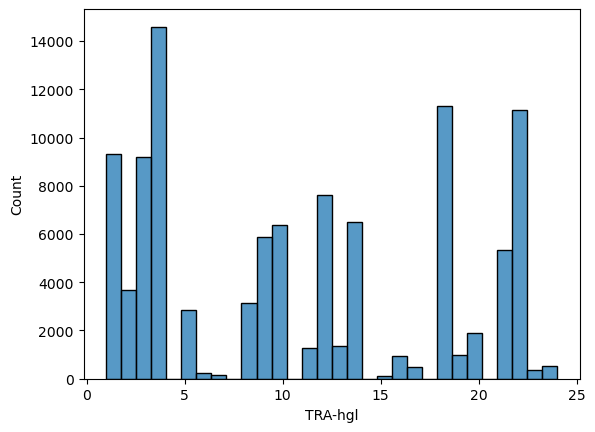

In [22]:
sns.histplot(data=dfOFF_FNT, x="TRA-hgl", bins=30)

# match TRA name

In [24]:
TRAmap = pd.read_csv("C:/Users/huguanla/Dropbox/545_Group_Project/545_Group_project_shared/data/TRA_code_20240418.csv",header=0)
TRAmap

,TRAall,code,name
0,not_avaliable,9999,NaN
1,ZX,27,NaN
2,ZY,28,NaN
3,ZX01,2701,NaN
4,ZY01,2801,NaN
...,...,...,...
806,Z26,2626,NaN
807,Z27,2627,NaN
808,Z28,2628,NaN
809,Z29,2629,NaN


In [23]:
dfOFF_FNT

,Unnamed: 0,code,product_name,brands,country,ingredients_text,additives,nutrition_grade_fr,energy,fat,...,salt,sodium,nutrition-score-fr,serving_size_numeric,serving_size_units,KCAL,NAsodium,FSANZ-hgl,NOVA-hgl,TRA-hgl
0,67,32117,Tricolor Tortellini,Napoleon,United States,"Egg pasta (refined durum semolina wheat flour,...",0.0,c,1611.0,9.23,...,1.13284,0.446000,7.0,65.0,g,385.406699,446.000000,-4.089640,3,3.0
1,72,33060,10-Grain Pancake Mix,Bob's Red Mill,United States,"Wheat, rye, triticale, oat, corn, barley, soy ...",2.0,c,1297.0,1.72,...,2.75844,1.086000,9.0,58.0,g,310.287081,1086.000000,-8.053166,4,1.0
2,175,69601,Fresh Organic Carrots,Bunny-Luv,United States,Fresh organic carrots,0.0,a,159.0,0.00,...,0.19558,0.077000,-2.0,78.0,g,38.038278,77.000000,-9.774875,1,22.0
3,176,290616,Salade Cesar,Kirkland Signature,Canada,INGREDIENTS : LAITUE. VINAIGRETTE (HUILE DE CA...,0.0,c,1210.0,12.00,...,2.16000,0.850000,6.0,100.0,g,289.473684,850.000000,1.966481,4,2.0
4,182,1938067,Chaussons tressés aux pommes,Kirkland Signature,Canada,"Ingrédients : Pâte (farine, margarines d'huile...",5.0,c,1090.0,10.70,...,0.64700,0.255000,9.0,150.0,g,260.765550,255.000000,4.214868,4,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105180,355883,95656335,Chipotle Peppers In Adobo Sauce,La Costena,United States,"Chipotle peppers, water, vinegar, tomatoes, on...",0.0,c,280.0,0.00,...,3.21818,1.267000,6.0,30.0,g,66.985646,1267.000000,-13.900986,3,18.0
105181,355884,95659305,Dal Makhani,Truly Indian,United States,"Tomato, black gram, water, milk cream, cottons...",0.0,b,502.0,5.33,...,1.37160,0.540000,2.0,150.0,g,120.095694,540.000000,-6.750500,3,18.0
105182,355888,9577283844672,100% Pur Jus 4 agrumes,Cora,France,"Jus d'orange (dont pulpe 1,6%), jus de clément...",0.0,c,192.0,0.50,...,0.03000,0.011811,4.0,200.0,ml,45.933014,11.811024,-3.312844,1,22.0
105183,355985,9787461062105,Natural Cassava,Industria De Casabe Paul,United States,Cassava.,0.0,a,1477.0,0.00,...,0.03048,0.012000,-1.0,85.0,g,353.349282,12.000000,-3.944408,1,16.0


In [29]:
# Assuming you have already loaded both dataframes (dfOFF_FNT and TRAmap)
merged_df = dfOFF_FNT.merge(TRAmap[['code', 'name']], how='left', left_on='TRA-hgl', right_on='code')

# This will give you a new DataFrame where 'name' from TRAmap is added to dfOFF_FNT
# You can drop the 'code' column if it's not needed
merged_df = merged_df.drop(columns=['code_y'])
merged_df

,Unnamed: 0,code_x,product_name,brands,country,ingredients_text,additives,nutrition_grade_fr,energy,fat,...,sodium,nutrition-score-fr,serving_size_numeric,serving_size_units,KCAL,NAsodium,FSANZ-hgl,NOVA-hgl,TRA-hgl,name
0,67,32117,Tricolor Tortellini,Napoleon,United States,"Egg pasta (refined durum semolina wheat flour,...",0.0,c,1611.0,9.23,...,0.446000,7.0,65.0,g,385.406699,446.000000,-4.089640,3,3.0,Cereals And Other Grain Products
1,72,33060,10-Grain Pancake Mix,Bob's Red Mill,United States,"Wheat, rye, triticale, oat, corn, barley, soy ...",2.0,c,1297.0,1.72,...,1.086000,9.0,58.0,g,310.287081,1086.000000,-8.053166,4,1.0,Bakery Products
2,175,69601,Fresh Organic Carrots,Bunny-Luv,United States,Fresh organic carrots,0.0,a,159.0,0.00,...,0.077000,-2.0,78.0,g,38.038278,77.000000,-9.774875,1,22.0,Vegetables
3,176,290616,Salade Cesar,Kirkland Signature,Canada,INGREDIENTS : LAITUE. VINAIGRETTE (HUILE DE CA...,0.0,c,1210.0,12.00,...,0.850000,6.0,100.0,g,289.473684,850.000000,1.966481,4,2.0,Beverages
4,182,1938067,Chaussons tressés aux pommes,Kirkland Signature,Canada,"Ingrédients : Pâte (farine, margarines d'huile...",5.0,c,1090.0,10.70,...,0.255000,9.0,150.0,g,260.765550,255.000000,4.214868,4,3.0,Cereals And Other Grain Products
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105180,355883,95656335,Chipotle Peppers In Adobo Sauce,La Costena,United States,"Chipotle peppers, water, vinegar, tomatoes, on...",0.0,c,280.0,0.00,...,1.267000,6.0,30.0,g,66.985646,1267.000000,-13.900986,3,18.0,"Sauces, Dips, Gravies And Condiments"
105181,355884,95659305,Dal Makhani,Truly Indian,United States,"Tomato, black gram, water, milk cream, cottons...",0.0,b,502.0,5.33,...,0.540000,2.0,150.0,g,120.095694,540.000000,-6.750500,3,18.0,"Sauces, Dips, Gravies And Condiments"
105182,355888,9577283844672,100% Pur Jus 4 agrumes,Cora,France,"Jus d'orange (dont pulpe 1,6%), jus de clément...",0.0,c,192.0,0.50,...,0.011811,4.0,200.0,ml,45.933014,11.811024,-3.312844,1,22.0,Vegetables
105183,355985,9787461062105,Natural Cassava,Industria De Casabe Paul,United States,Cassava.,0.0,a,1477.0,0.00,...,0.012000,-1.0,85.0,g,353.349282,12.000000,-3.944408,1,16.0,"Potatoes, Sweet Potatoes And Yams"


In [34]:
merged_df = merged_df.rename(columns={'code_x': 'code', 'name': 'TRA-name-hgl'})

In [35]:
merged_df.to_csv("C:/Users/huguanla/Dropbox/545_Group_Project/545_Group_project_shared/data/food_fact_withUnhealthScore_withNOVA_withCategory.csv", index=False)
merged_df

,Unnamed: 0,code,product_name,brands,country,ingredients_text,additives,nutrition_grade_fr,energy,fat,...,sodium,nutrition-score-fr,serving_size_numeric,serving_size_units,KCAL,NAsodium,FSANZ-hgl,NOVA-hgl,TRA-hgl,TRA-name-hgl
0,67,32117,Tricolor Tortellini,Napoleon,United States,"Egg pasta (refined durum semolina wheat flour,...",0.0,c,1611.0,9.23,...,0.446000,7.0,65.0,g,385.406699,446.000000,-4.089640,3,3.0,Cereals And Other Grain Products
1,72,33060,10-Grain Pancake Mix,Bob's Red Mill,United States,"Wheat, rye, triticale, oat, corn, barley, soy ...",2.0,c,1297.0,1.72,...,1.086000,9.0,58.0,g,310.287081,1086.000000,-8.053166,4,1.0,Bakery Products
2,175,69601,Fresh Organic Carrots,Bunny-Luv,United States,Fresh organic carrots,0.0,a,159.0,0.00,...,0.077000,-2.0,78.0,g,38.038278,77.000000,-9.774875,1,22.0,Vegetables
3,176,290616,Salade Cesar,Kirkland Signature,Canada,INGREDIENTS : LAITUE. VINAIGRETTE (HUILE DE CA...,0.0,c,1210.0,12.00,...,0.850000,6.0,100.0,g,289.473684,850.000000,1.966481,4,2.0,Beverages
4,182,1938067,Chaussons tressés aux pommes,Kirkland Signature,Canada,"Ingrédients : Pâte (farine, margarines d'huile...",5.0,c,1090.0,10.70,...,0.255000,9.0,150.0,g,260.765550,255.000000,4.214868,4,3.0,Cereals And Other Grain Products
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105180,355883,95656335,Chipotle Peppers In Adobo Sauce,La Costena,United States,"Chipotle peppers, water, vinegar, tomatoes, on...",0.0,c,280.0,0.00,...,1.267000,6.0,30.0,g,66.985646,1267.000000,-13.900986,3,18.0,"Sauces, Dips, Gravies And Condiments"
105181,355884,95659305,Dal Makhani,Truly Indian,United States,"Tomato, black gram, water, milk cream, cottons...",0.0,b,502.0,5.33,...,0.540000,2.0,150.0,g,120.095694,540.000000,-6.750500,3,18.0,"Sauces, Dips, Gravies And Condiments"
105182,355888,9577283844672,100% Pur Jus 4 agrumes,Cora,France,"Jus d'orange (dont pulpe 1,6%), jus de clément...",0.0,c,192.0,0.50,...,0.011811,4.0,200.0,ml,45.933014,11.811024,-3.312844,1,22.0,Vegetables
105183,355985,9787461062105,Natural Cassava,Industria De Casabe Paul,United States,Cassava.,0.0,a,1477.0,0.00,...,0.012000,-1.0,85.0,g,353.349282,12.000000,-3.944408,1,16.0,"Potatoes, Sweet Potatoes And Yams"


# this is our final food dataset

In [36]:
foodFinal = pd.read_csv("C:/Users/huguanla/Dropbox/545_Group_Project/545_Group_project_shared/data/food_fact_withUnhealthScore_withNOVA_withCategory.csv",header=0)
foodFinal

,Unnamed: 0,code,product_name,brands,country,ingredients_text,additives,nutrition_grade_fr,energy,fat,...,sodium,nutrition-score-fr,serving_size_numeric,serving_size_units,KCAL,NAsodium,FSANZ-hgl,NOVA-hgl,TRA-hgl,TRA-name-hgl
0,67,32117,Tricolor Tortellini,Napoleon,United States,"Egg pasta (refined durum semolina wheat flour,...",0.0,c,1611.0,9.23,...,0.446000,7.0,65.0,g,385.406699,446.000000,-4.089640,3,3.0,Cereals And Other Grain Products
1,72,33060,10-Grain Pancake Mix,Bob's Red Mill,United States,"Wheat, rye, triticale, oat, corn, barley, soy ...",2.0,c,1297.0,1.72,...,1.086000,9.0,58.0,g,310.287081,1086.000000,-8.053166,4,1.0,Bakery Products
2,175,69601,Fresh Organic Carrots,Bunny-Luv,United States,Fresh organic carrots,0.0,a,159.0,0.00,...,0.077000,-2.0,78.0,g,38.038278,77.000000,-9.774875,1,22.0,Vegetables
3,176,290616,Salade Cesar,Kirkland Signature,Canada,INGREDIENTS : LAITUE. VINAIGRETTE (HUILE DE CA...,0.0,c,1210.0,12.00,...,0.850000,6.0,100.0,g,289.473684,850.000000,1.966481,4,2.0,Beverages
4,182,1938067,Chaussons tressés aux pommes,Kirkland Signature,Canada,"Ingrédients : Pâte (farine, margarines d'huile...",5.0,c,1090.0,10.70,...,0.255000,9.0,150.0,g,260.765550,255.000000,4.214868,4,3.0,Cereals And Other Grain Products
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105180,355883,95656335,Chipotle Peppers In Adobo Sauce,La Costena,United States,"Chipotle peppers, water, vinegar, tomatoes, on...",0.0,c,280.0,0.00,...,1.267000,6.0,30.0,g,66.985646,1267.000000,-13.900986,3,18.0,"Sauces, Dips, Gravies And Condiments"
105181,355884,95659305,Dal Makhani,Truly Indian,United States,"Tomato, black gram, water, milk cream, cottons...",0.0,b,502.0,5.33,...,0.540000,2.0,150.0,g,120.095694,540.000000,-6.750500,3,18.0,"Sauces, Dips, Gravies And Condiments"
105182,355888,9577283844672,100% Pur Jus 4 agrumes,Cora,France,"Jus d'orange (dont pulpe 1,6%), jus de clément...",0.0,c,192.0,0.50,...,0.011811,4.0,200.0,ml,45.933014,11.811024,-3.312844,1,22.0,Vegetables
105183,355985,9787461062105,Natural Cassava,Industria De Casabe Paul,United States,Cassava.,0.0,a,1477.0,0.00,...,0.012000,-1.0,85.0,g,353.349282,12.000000,-3.944408,1,16.0,"Potatoes, Sweet Potatoes And Yams"
